In [2]:
!pip install rdflib networkx matplotlib

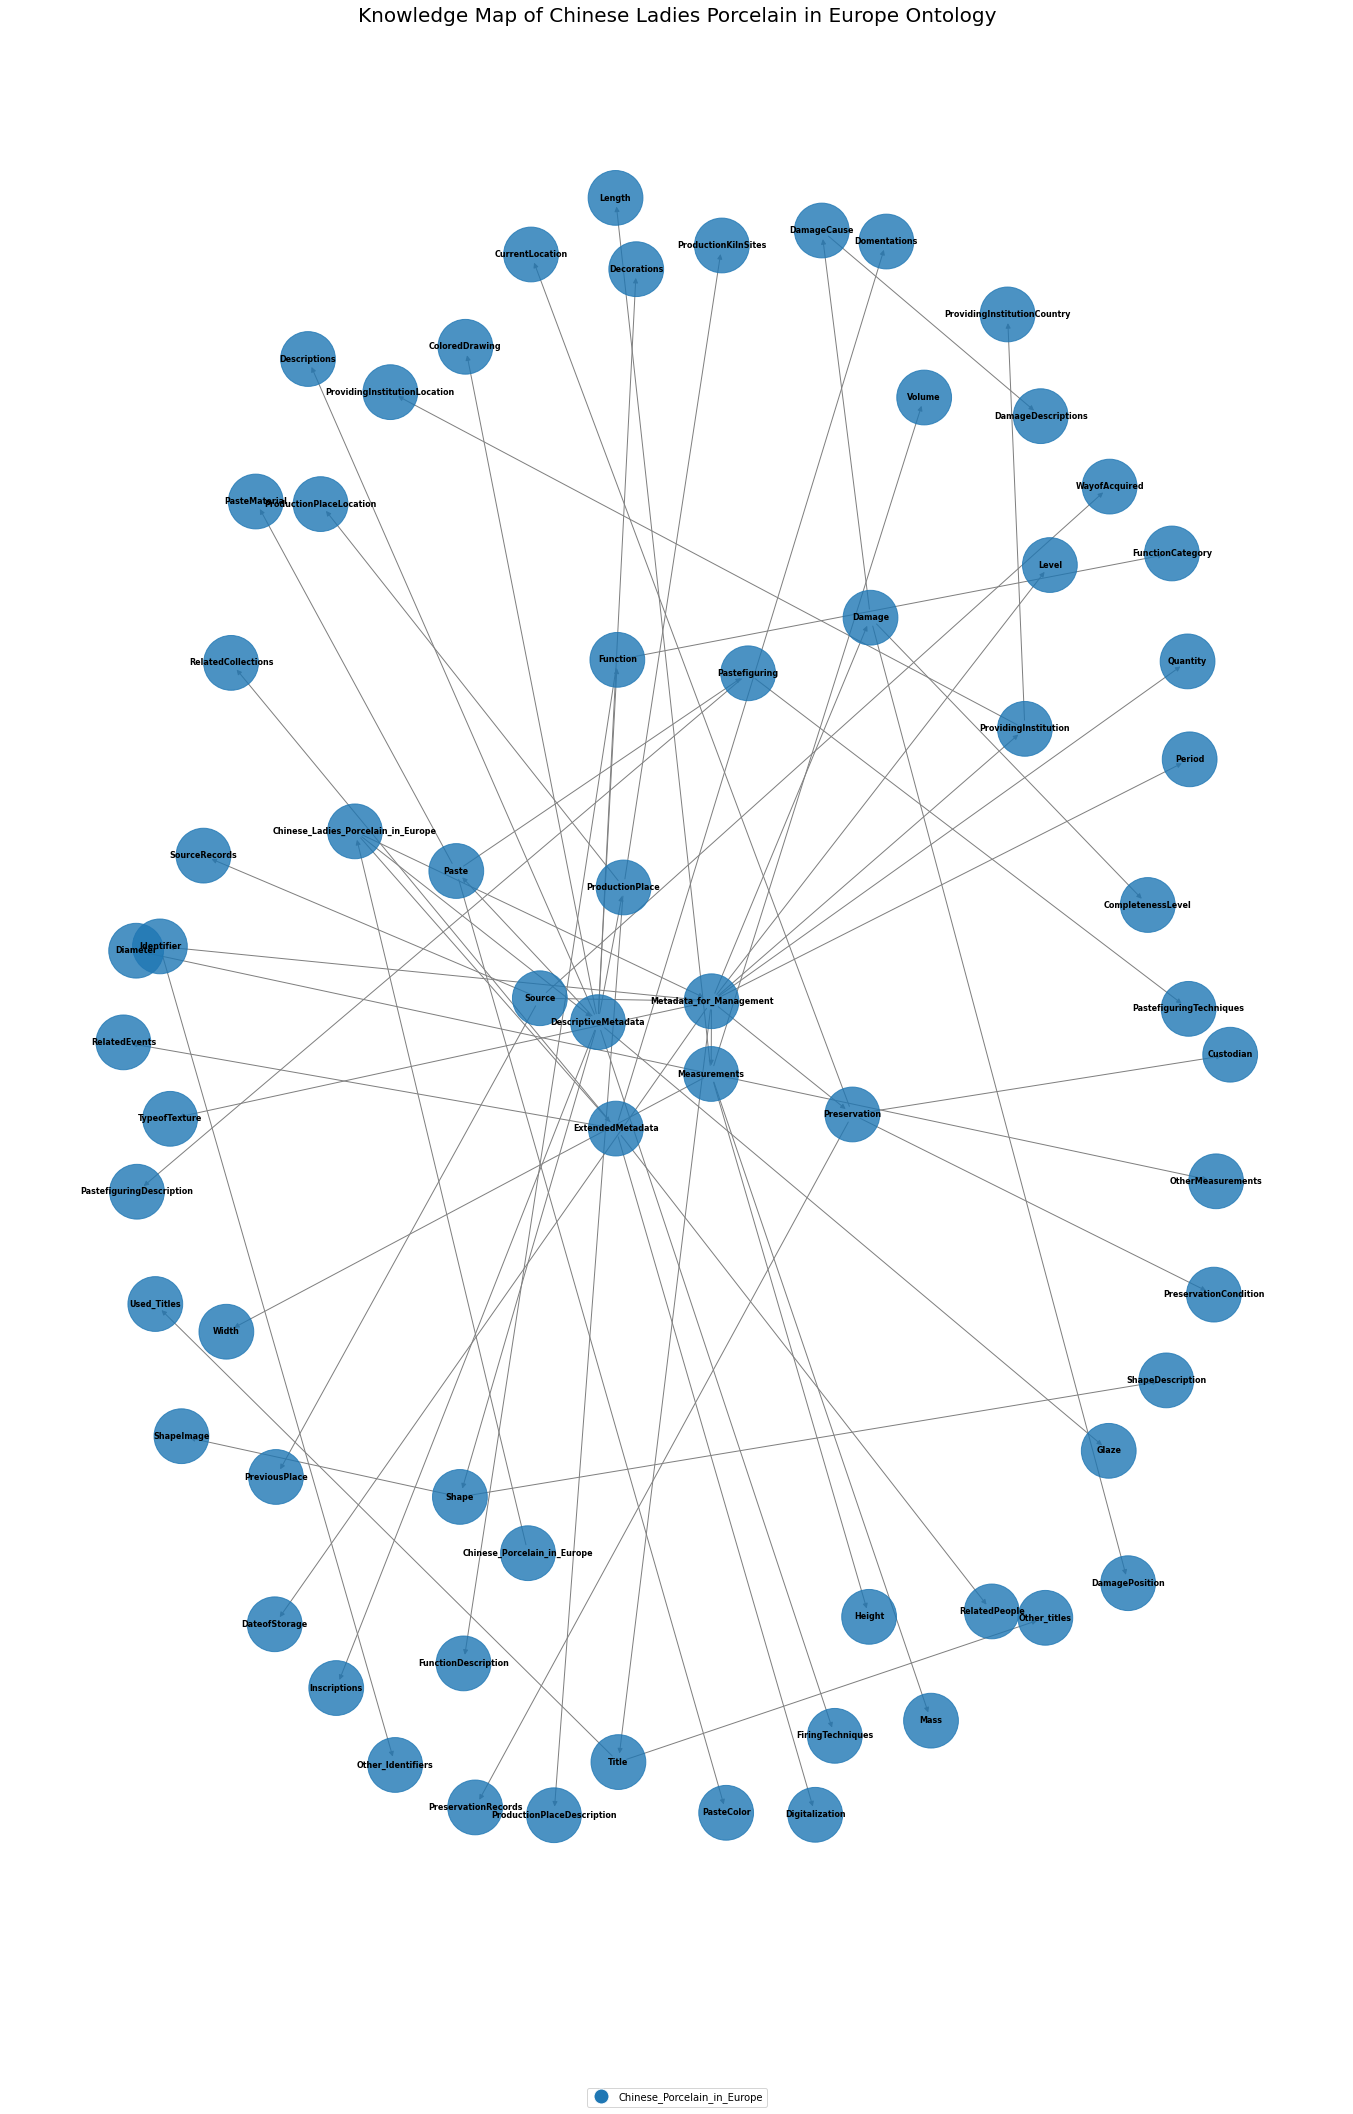


Class Hierarchy:
- Chinese_Porcelain_in_Europe
  - Chinese_Ladies_Porcelain_in_Europe
    - DescriptiveMetadata
      - ColoredDrawing
      - Decorations
      - Descriptions
      - FiringTechniques
      - Function
        - FunctionCategory
        - FunctionDescription
      - Glaze
      - Inscriptions
      - Paste
        - PasteColor
        - PasteMaterial
        - Pastefiguring
          - PastefiguringDescription
          - PastefiguringTechniques
      - ProductionPlace
        - ProductionKilnSites
        - ProductionPlaceDescription
        - ProductionPlaceLocation
      - Shape
        - ShapeDescription
        - ShapeImage
    - ExtendedMetadata
      - Digitalization
      - Domentations
      - RelatedCollections
      - RelatedEvents
      - RelatedPeople
    - Metadata_for_Management
      - Damage
        - CompletenessLevel
        - DamageCause
          - DamageDescriptions
        - DamagePosition
      - DateofStorage
      - Identifier
        - Other_

In [12]:
import json
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

import json
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

# Load the JSON-LD data
with open('ontology.json', 'r') as f:
    data = json.load(f)

# Create a directed graph
G = nx.DiGraph()

# Function to get the class name from an IRI
def get_class_name(iri):
    return iri.split('#')[-1]

# Dictionary to store class hierarchies
class_hierarchy = defaultdict(list)

# Add nodes and edges to the graph
for item in data:
    if '@type' in item and 'http://www.w3.org/2002/07/owl#Class' in item['@type']:
        class_name = get_class_name(item['@id'])
        G.add_node(class_name)
        
        if 'http://www.w3.org/2000/01/rdf-schema#subClassOf' in item:
            for superclass in item['http://www.w3.org/2000/01/rdf-schema#subClassOf']:
                superclass_name = get_class_name(superclass['@id'])
                G.add_edge(superclass_name, class_name)
                class_hierarchy[superclass_name].append(class_name)

# Identify top-level classes
top_level_classes = [node for node in G.nodes() if G.in_degree(node) == 0]

# Set up the plot
plt.figure(figsize=(24, 36))

# Colors for different branches
color_map = plt.cm.get_cmap('tab20')
colors = [color_map(i) for i in np.linspace(0, 1, len(top_level_classes))]

# Position nodes using a hierarchical layout
pos = nx.spring_layout(G, k=0.9, iterations=50)

# Draw the graph
for i, top_class in enumerate(top_level_classes):
    # Get all descendants of the top-level class
    descendants = nx.descendants(G, top_class)
    descendants.add(top_class)
    
    # Create a subgraph
    subgraph = G.subgraph(descendants)
    
    # Draw the subgraph
    nx.draw_networkx_nodes(subgraph, pos, node_color=[colors[i]] * len(subgraph), node_size=3000, alpha=0.8)
    nx.draw_networkx_edges(subgraph, pos, edge_color='gray', arrows=True)
    nx.draw_networkx_labels(subgraph, pos, font_size=8, font_weight='bold')

# Add a legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=class_name,
                   markerfacecolor=color, markersize=15)
                   for class_name, color in zip(top_level_classes, colors)]
plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)

# Show the plot
plt.title("Knowledge Map of Chinese Ladies Porcelain in Europe Ontology", fontsize=20)
plt.axis('off')

# Save the figure
plt.savefig("Knowledge Map of Chinese Ladies Porcelain in Europe Ontology", format="png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# Print class hierarchy
def print_hierarchy(class_name, level=0):
    print("  " * level + "- " + class_name)
    for subclass in sorted(class_hierarchy[class_name]):
        print_hierarchy(subclass, level + 1)

print("\nClass Hierarchy:")
for top_class in sorted(top_level_classes):
    print_hierarchy(top_class)

Map saved successfully.


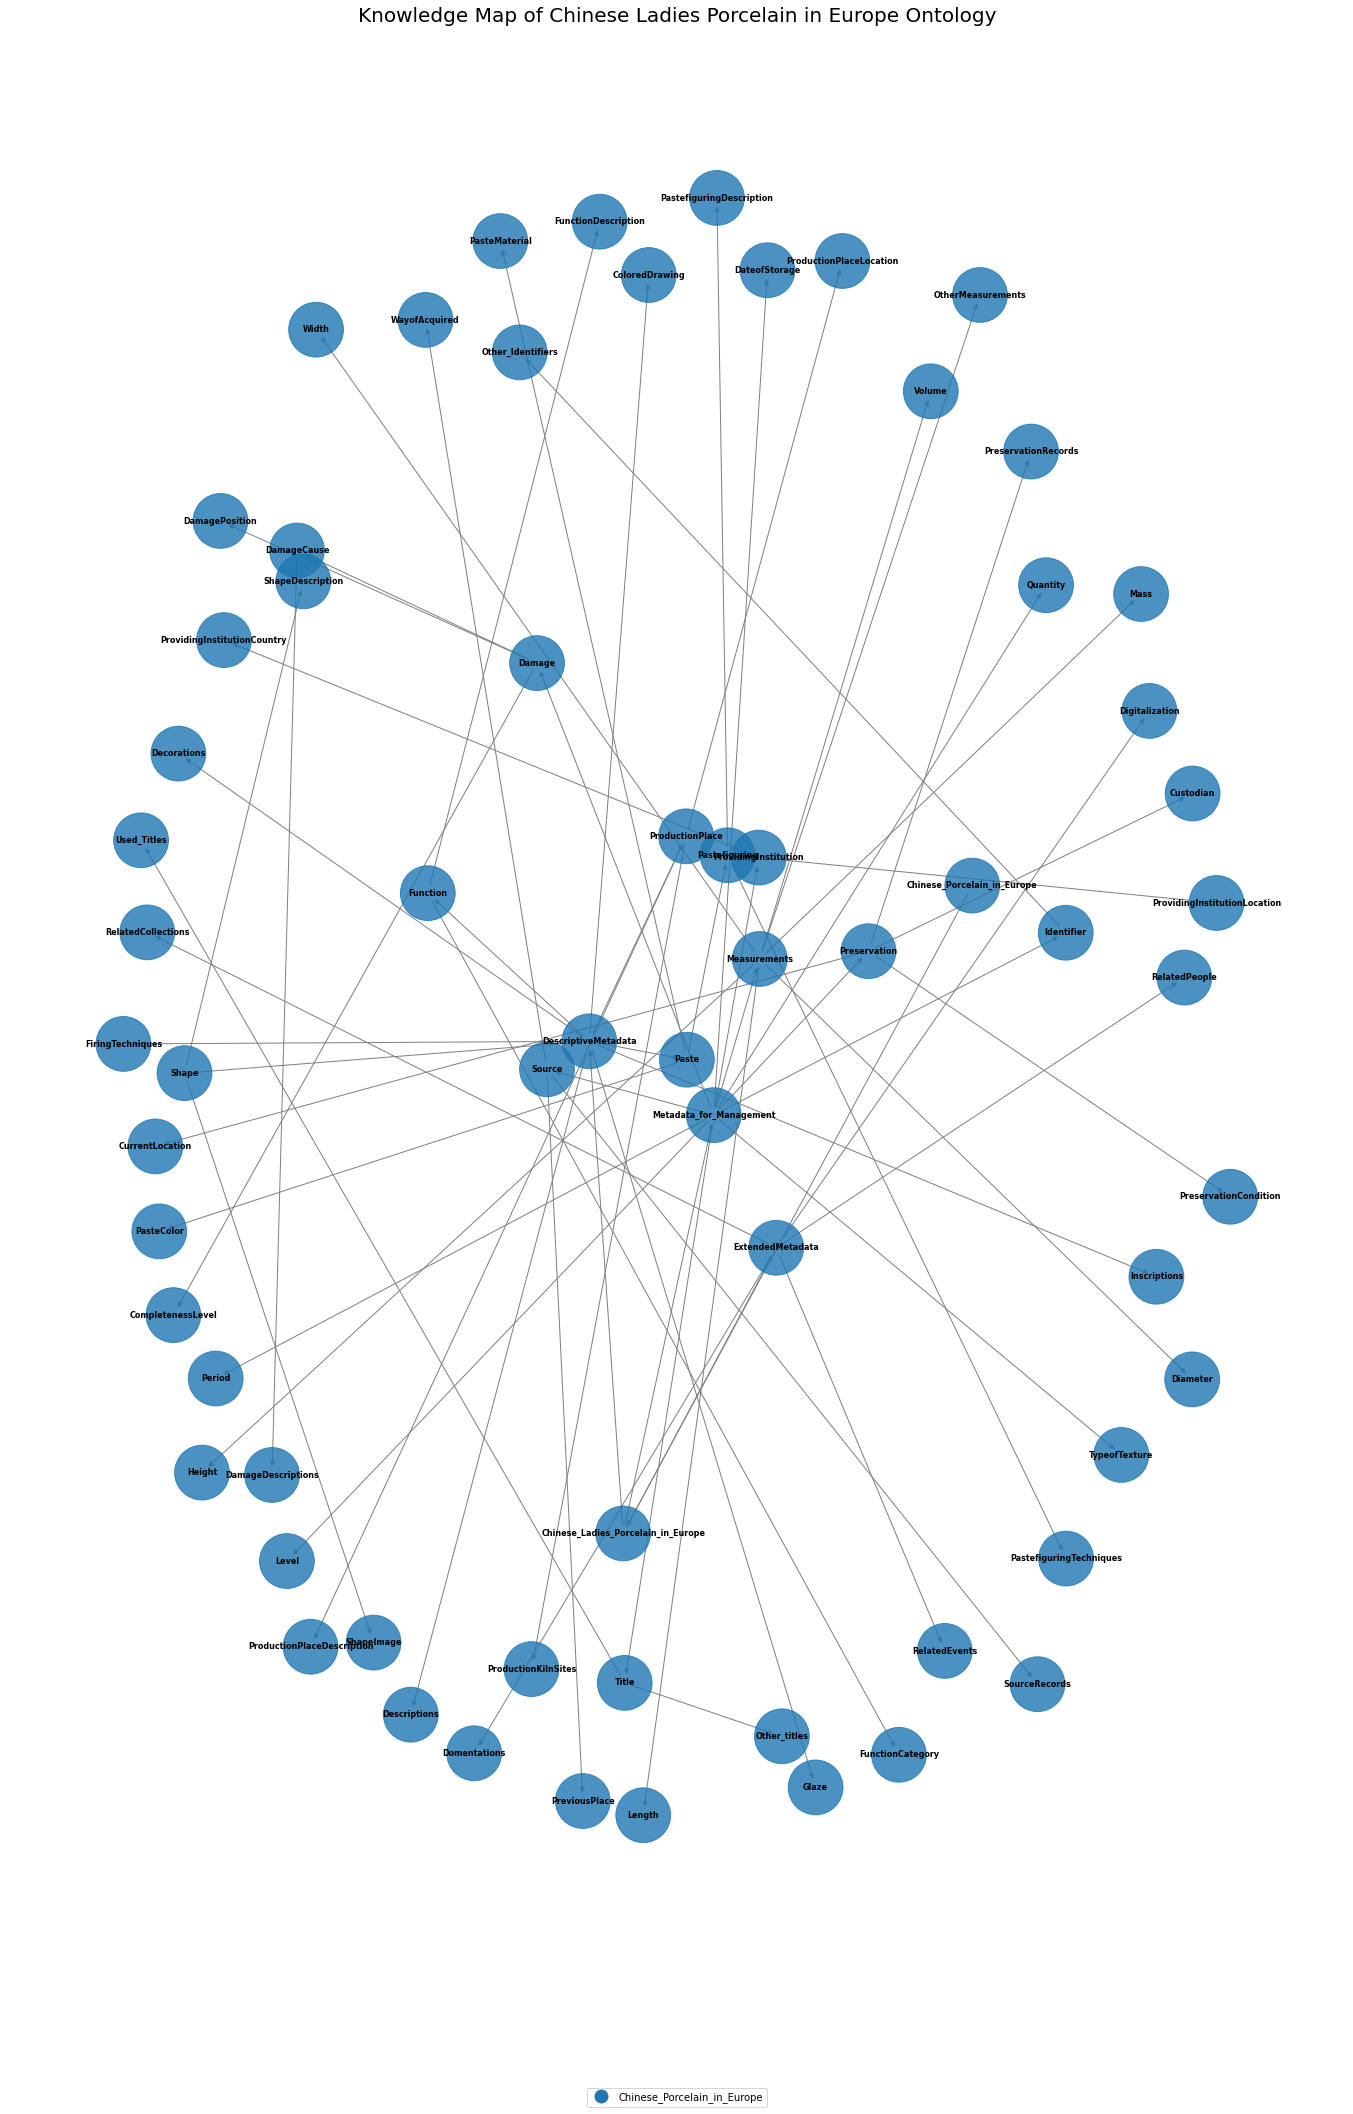


Class Hierarchy:
- Chinese_Porcelain_in_Europe
  - Chinese_Ladies_Porcelain_in_Europe
    - DescriptiveMetadata
      - ColoredDrawing
      - Decorations
      - Descriptions
      - FiringTechniques
      - Function
        - FunctionCategory
        - FunctionDescription
      - Glaze
      - Inscriptions
      - Paste
        - PasteColor
        - PasteMaterial
        - Pastefiguring
          - PastefiguringDescription
          - PastefiguringTechniques
      - ProductionPlace
        - ProductionKilnSites
        - ProductionPlaceDescription
        - ProductionPlaceLocation
      - Shape
        - ShapeDescription
        - ShapeImage
    - ExtendedMetadata
      - Digitalization
      - Domentations
      - RelatedCollections
      - RelatedEvents
      - RelatedPeople
    - Metadata_for_Management
      - Damage
        - CompletenessLevel
        - DamageCause
          - DamageDescriptions
        - DamagePosition
      - DateofStorage
      - Identifier
        - Other_

In [13]:
import json
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
import io

# Load the JSON-LD data
try:
    with open('ontology.json', 'r', encoding='utf-8') as f:
        data = json.load(f)
except UnicodeDecodeError:
    # If UTF-8 fails, try with ISO-8859-1 encoding
    with open('ontology.json', 'r', encoding='iso-8859-1') as f:
        data = json.load(f)

# Create a directed graph
G = nx.DiGraph()

# Function to get the class name from an IRI
def get_class_name(iri):
    return iri.split('#')[-1]

# Dictionary to store class hierarchies
class_hierarchy = defaultdict(list)

# Add nodes and edges to the graph
for item in data:
    if '@type' in item and 'http://www.w3.org/2002/07/owl#Class' in item['@type']:
        class_name = get_class_name(item['@id'])
        G.add_node(class_name)
        
        if 'http://www.w3.org/2000/01/rdf-schema#subClassOf' in item:
            for superclass in item['http://www.w3.org/2000/01/rdf-schema#subClassOf']:
                superclass_name = get_class_name(superclass['@id'])
                G.add_edge(superclass_name, class_name)
                class_hierarchy[superclass_name].append(class_name)

# Identify top-level classes
top_level_classes = [node for node in G.nodes() if G.in_degree(node) == 0]

# Set up the plot
plt.figure(figsize=(24, 36))

# Colors for different branches
color_map = plt.cm.get_cmap('tab20')
colors = [color_map(i) for i in np.linspace(0, 1, len(top_level_classes))]

# Position nodes using a hierarchical layout
pos = nx.spring_layout(G, k=0.9, iterations=50)

# Draw the graph
for i, top_class in enumerate(top_level_classes):
    descendants = nx.descendants(G, top_class)
    descendants.add(top_class)
    subgraph = G.subgraph(descendants)
    nx.draw_networkx_nodes(subgraph, pos, node_color=[colors[i]] * len(subgraph), node_size=3000, alpha=0.8)
    nx.draw_networkx_edges(subgraph, pos, edge_color='gray', arrows=True)
    nx.draw_networkx_labels(subgraph, pos, font_size=8, font_weight='bold')

# Add a legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=class_name,
                   markerfacecolor=color, markersize=15)
                   for class_name, color in zip(top_level_classes, colors)]
plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)

# Show the plot
plt.title("Knowledge Map of Chinese Ladies Porcelain in Europe Ontology", fontsize=20)
plt.axis('off')

# Save the figure
try:
    plt.savefig("Knowledge_Map_of_Chinese_Ladies_Porcelain_in_Europe_Ontology.png", format="png", dpi=300, bbox_inches='tight')
    print("Map saved successfully.")
except Exception as e:
    print(f"Error saving the map: {e}")
    # If saving as PNG fails, try saving as SVG
    try:
        plt.savefig("Knowledge_Map_of_Chinese_Ladies_Porcelain_in_Europe_Ontology.svg", format="svg", dpi=300, bbox_inches='tight')
        print("Map saved as SVG successfully.")
    except Exception as e:
        print(f"Error saving the map as SVG: {e}")

# Display the plot
plt.show()

# Print class hierarchy
def print_hierarchy(class_name, level=0):
    print("  " * level + "- " + class_name)
    for subclass in sorted(class_hierarchy[class_name]):
        print_hierarchy(subclass, level + 1)

print("\nClass Hierarchy:")
for top_class in sorted(top_level_classes):
    print_hierarchy(top_class)

# Save the hierarchy to a text file
try:
    with io.open("ontology_hierarchy.txt", "w", encoding="utf-8") as f:
        for top_class in sorted(top_level_classes):
            f.write(top_class + "\n")
            for subclass in sorted(class_hierarchy[top_class]):
                f.write("  - " + subclass + "\n")
    print("Hierarchy saved to ontology_hierarchy.txt")
except Exception as e:
    print(f"Error saving hierarchy to file: {e}")